In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [5]:
customers = pd.read_csv('/Customers.csv')
products = pd.read_csv('/Products.csv')
transactions = pd.read_csv('/Transactions.csv')


In [6]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [7]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [8]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [9]:
data = transactions.merge(customers, on='CustomerID', how='left')
data = data.merge(products, on='ProductID', how='left')


In [10]:
print(data.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

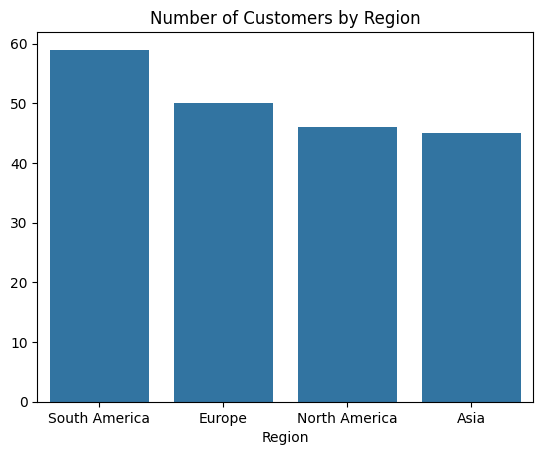

In [11]:
region_counts = customers['Region'].value_counts()
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Customers by Region')
plt.show()


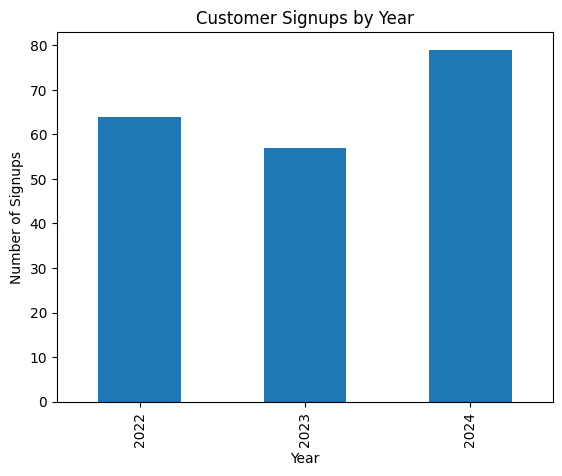

In [12]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
signup_trends.plot(kind='bar')
plt.title('Customer Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


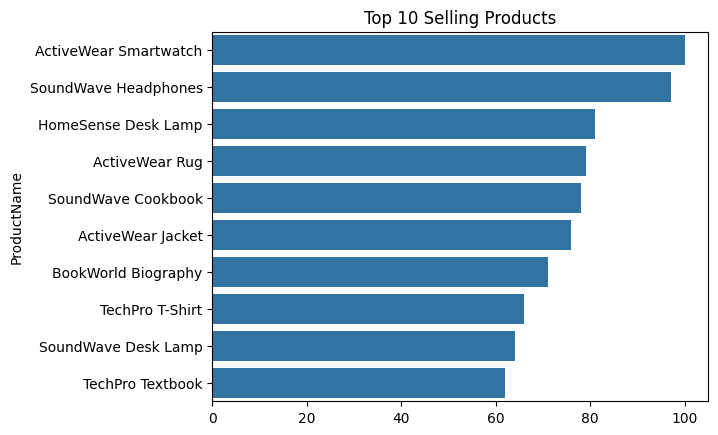

In [13]:
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_products.index, x=top_products.values)
plt.title('Top 10 Selling Products')
plt.show()


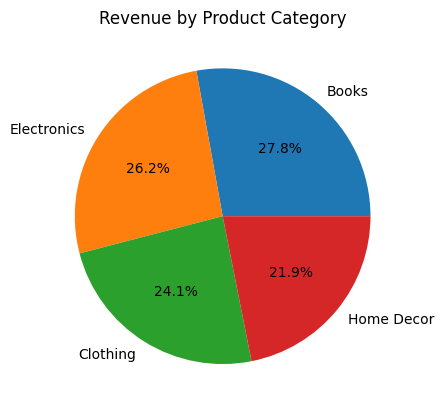

In [14]:
category_revenue = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue by Product Category')
plt.ylabel('')
plt.show()


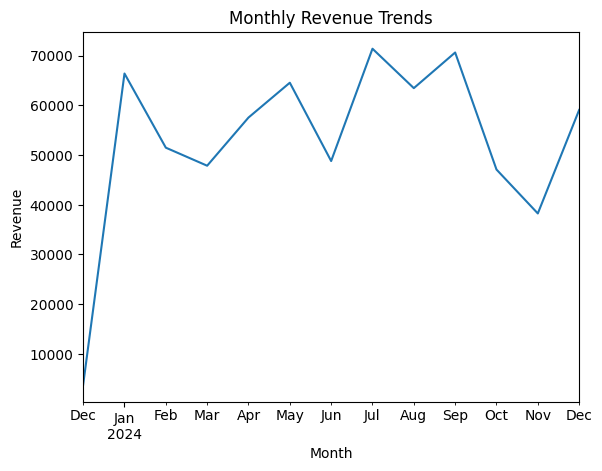

In [15]:
revenue_trends = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
revenue_trends.plot(kind='line')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


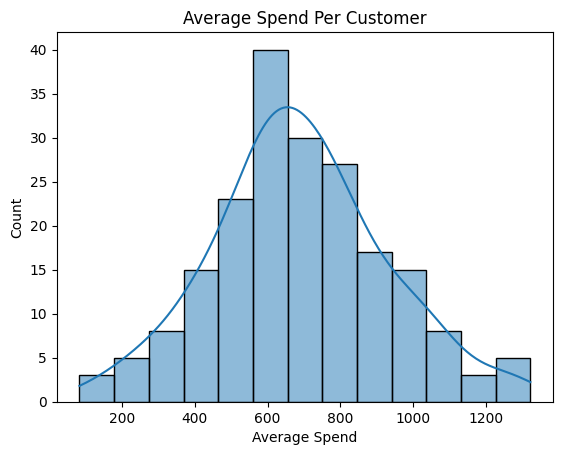

In [16]:
avg_spend = data.groupby('CustomerID')['TotalValue'].mean()
sns.histplot(avg_spend, kde=True)
plt.title('Average Spend Per Customer')
plt.xlabel('Average Spend')
plt.show()
